In [1]:
import numpy as np # We'll be storing our data as numpy arrays
import os # For handling directories
from PIL import Image # For handling the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # Plotting

In [2]:
%%time
lookup = dict()
reverselookup = dict()
count = 0
for j in os.listdir('../input/leapgestrecog/leapGestRecog/00/'):
    if not j.startswith('.'): # If running this code locally, this is to 
                              # ensure you aren't reading in hidden folders
        lookup[j] = count
        reverselookup[count] = j
        count = count + 1
lookup

CPU times: user 802 µs, sys: 0 ns, total: 802 µs
Wall time: 18.9 ms


{'02_l': 0,
 '04_fist_moved': 1,
 '09_c': 2,
 '10_down': 3,
 '06_index': 4,
 '08_palm_moved': 5,
 '07_ok': 6,
 '05_thumb': 7,
 '01_palm': 8,
 '03_fist': 9}

In [3]:
%%time
x_data = []
y_data = []
datacount = 0 # We'll use this to tally how many images are in our dataset
for i in range(0, 10): # Loop over the ten top-level folders
    for j in os.listdir('../input/leapgestrecog/leapGestRecog/0' + str(i) + '/'):
        if not j.startswith('.'): # Again avoid hidden folders
            count = 0 # To tally images of a given gesture
            for k in os.listdir('../input/leapgestrecog/leapGestRecog/0' + 
                                str(i) + '/' + j + '/'):
                                # Loop over the images
                img = Image.open('../input/leapgestrecog/leapGestRecog/0' + 
                                 str(i) + '/' + j + '/' + k).convert('L')
                                # Read in and convert to greyscale
                img = img.resize((320, 120))
                arr = np.array(img)
                x_data.append(arr) 
                count = count + 1
            y_values = np.full((count, 1), lookup[j]) 
            y_data.append(y_values)
            datacount = datacount + count
x_data = np.array(x_data, dtype = 'float32')
y_data = np.array(y_data)
y_data = y_data.reshape(datacount, 1) # Reshape to be the correct size

CPU times: user 56.5 s, sys: 3.23 s, total: 59.7 s
Wall time: 3min 27s


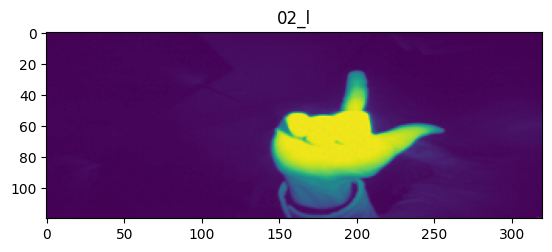

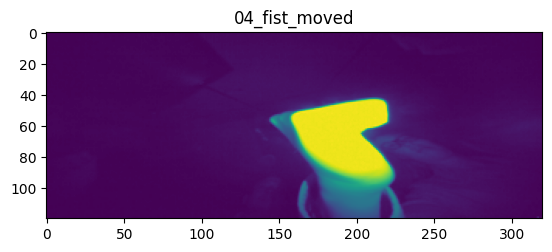

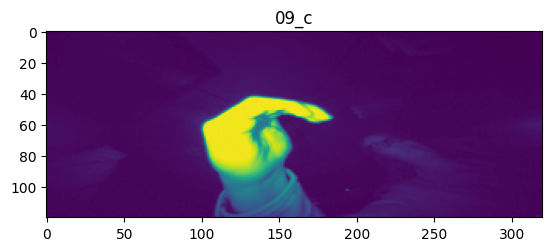

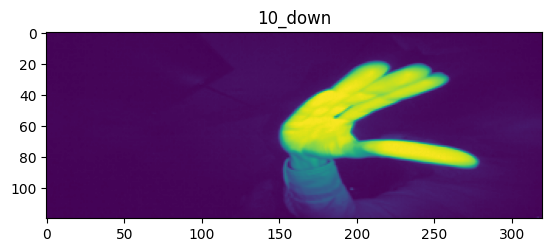

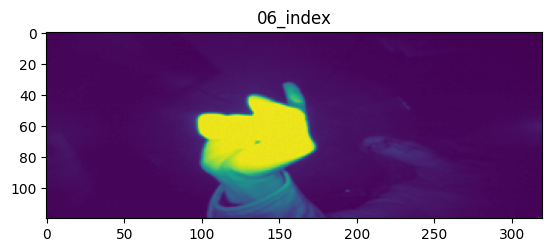

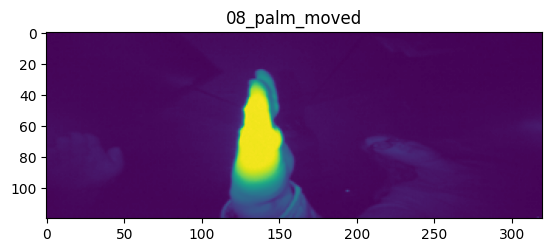

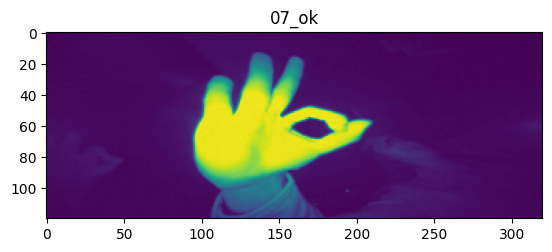

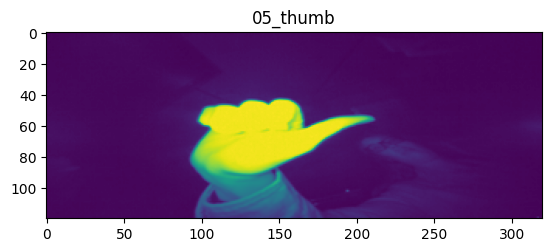

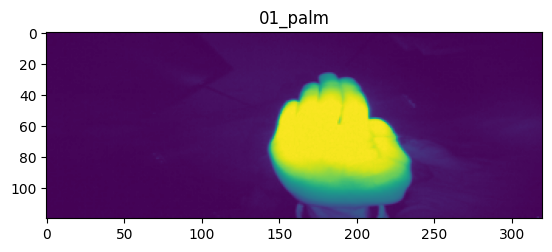

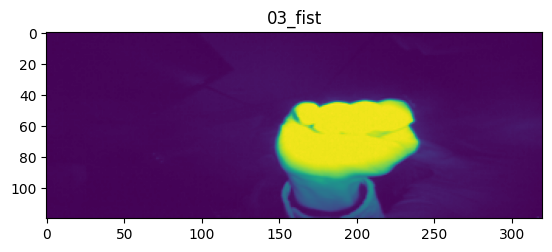

CPU times: user 3.56 s, sys: 1.63 s, total: 5.19 s
Wall time: 2.51 s


In [4]:
%%time
from random import randint
for i in range(0, 10):
    plt.imshow(x_data[i*200 , :, :])
    plt.title(reverselookup[y_data[i*200 ,0]])
    plt.show()


In [5]:
import keras
from keras.utils import to_categorical
y_data = to_categorical(y_data)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
x_data = x_data.reshape((datacount, 120, 320, 1))
x_data /= 255

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_further,y_train,y_further = train_test_split(x_data,y_data,test_size = 0.2)
x_validate,x_test,y_validate,y_test = train_test_split(x_further,y_further,test_size = 0.5)

In [8]:
from keras import layers
from keras import models

In [9]:
model=models.Sequential()
model.add(layers.Conv2D(32, (5, 5), strides=(2, 2), activation='relu', input_shape=(120, 320,1))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [10]:
%%time
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=64, verbose=1, validation_data=(x_validate, y_validate))

Epoch 1/5
250/250 [==============================] - 8s 17ms/step - loss: 0.3180 - accuracy: 0.8976 - val_loss: 0.0667 - val_accuracy: 0.9835
Epoch 2/5
250/250 [==============================] - 3s 13ms/step - loss: 0.0168 - accuracy: 0.9951 - val_loss: 0.0441 - val_accuracy: 0.9935
Epoch 3/5
250/250 [==============================] - 3s 14ms/step - loss: 0.0051 - accuracy: 0.9986 - val_loss: 0.0368 - val_accuracy: 0.9975
Epoch 4/5
250/250 [==============================] - 3s 13ms/step - loss: 4.2289e-04 - accuracy: 0.9999 - val_loss: 0.0265 - val_accuracy: 0.9975
Epoch 5/5
250/250 [==============================] - 3s 13ms/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.0427 - val_accuracy: 0.9970
CPU times: user 25.1 s, sys: 6.36 s, total: 31.5 s
Wall time: 26.1 s


In [11]:
%%time
[loss, acc] = model.evaluate(x_test,y_test,verbose=1)
print("Accuracy:" + str(acc))

63/63 [==============================] - 0s 4ms/step - loss: 5.7408 - accuracy: 0.5880
Accuracy:0.5879999995231628
CPU times: user 735 ms, sys: 416 ms, total: 1.15 s
Wall time: 962 ms


In [12]:
%%time
# Model weights and model
model.save_weights('gesture_model_weights.h5')
model.save("gesture_model.h5")

CPU times: user 49.2 ms, sys: 11.2 ms, total: 60.4 ms
Wall time: 56.3 ms


In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow import image
import numpy as np

In [14]:

model.save('gesture_recognition_model.h5')


# model.save_weights('gesture_recognition_model_weights.h5')

In [15]:
from keras.models import load_model

loaded_model = load_model('gesture_recognition_model.h5')

#loaded_model.load_weights('gesture_recognition_model_weights.h5')

In [16]:
from keras.preprocessing import image
import numpy as np

In [17]:
t_test = []

datacount = 0 # We'll use this to tally how many images are in our dataset
folder_path = '/kaggle/input/test2-img/'

for filename in os.listdir(folder_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):
       
        img_path = os.path.join(folder_path, filename)
        count = 0 # To tally images of a given gesture

        
        img = Image.open(img_path).convert('L')  # Convert to grayscale
        img = img.resize((320, 120))
        arr = np.array(img)
        t_test.append(arr)
        count = count + 1
        
    datacount = datacount + count
t_test = np.array(t_test, dtype = 'float32')

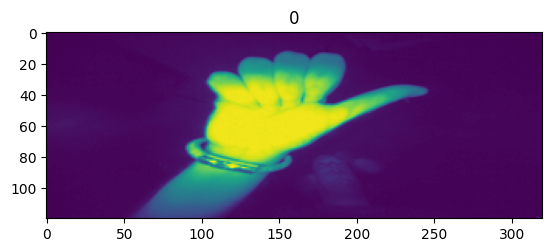

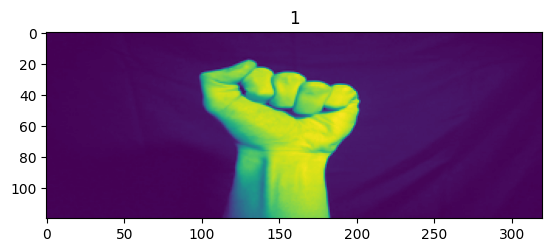

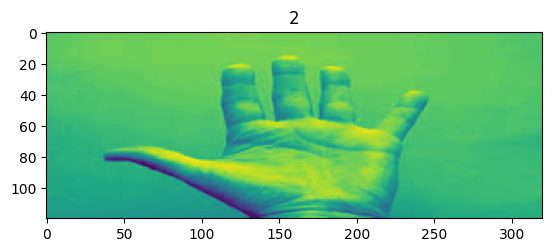

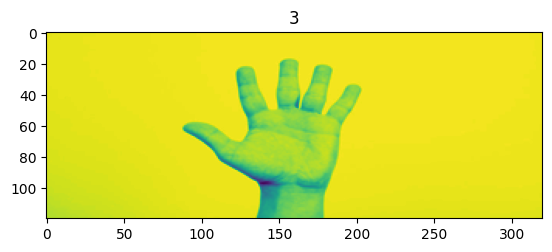

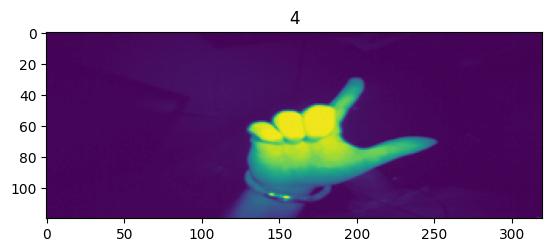

In [18]:
for i in range(0, 5):
    plt.imshow(t_test[i , :, :])
    plt.title(i)
    plt.show()

1/1 [==============================] - 0s 177ms/step


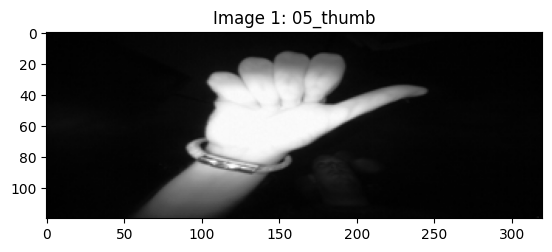

1/1 [==============================] - 0s 22ms/step


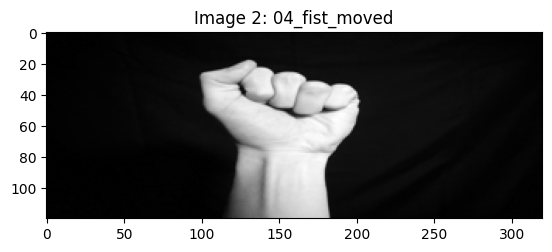

1/1 [==============================] - 0s 21ms/step


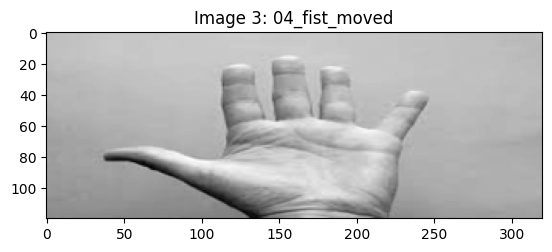

1/1 [==============================] - 0s 21ms/step


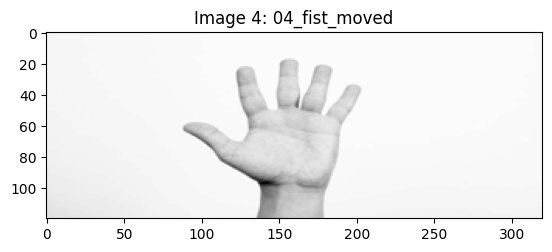

1/1 [==============================] - 0s 21ms/step


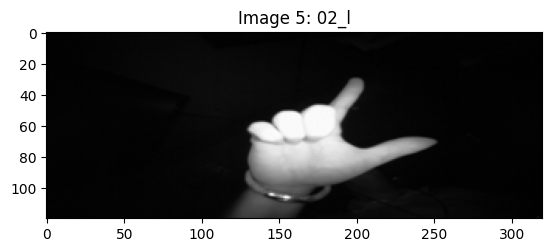

1/1 [==============================] - 0s 20ms/step


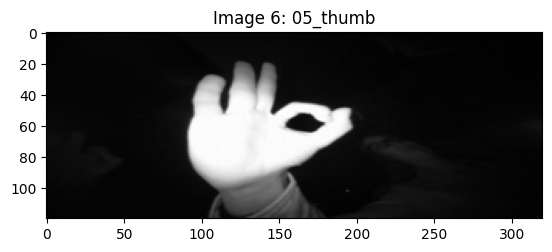

1/1 [==============================] - 0s 21ms/step


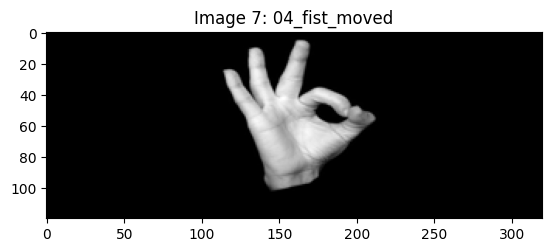

1/1 [==============================] - 0s 20ms/step


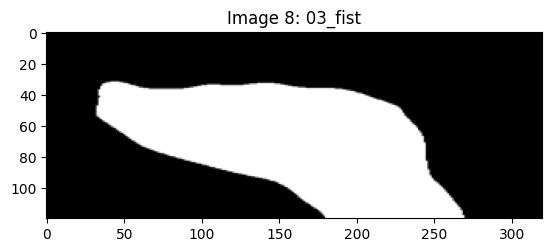

1/1 [==============================] - 0s 20ms/step


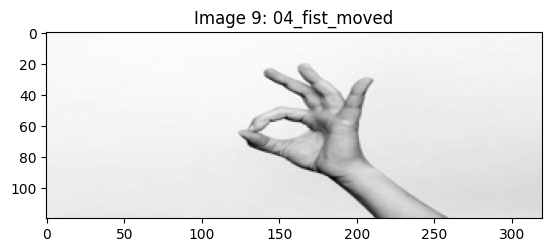

1/1 [==============================] - 0s 22ms/step


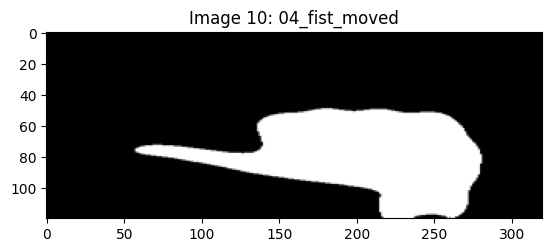

1/1 [==============================] - 0s 21ms/step


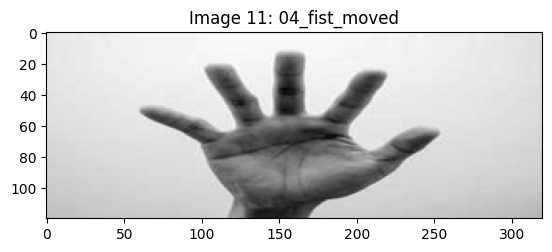

1/1 [==============================] - 0s 21ms/step


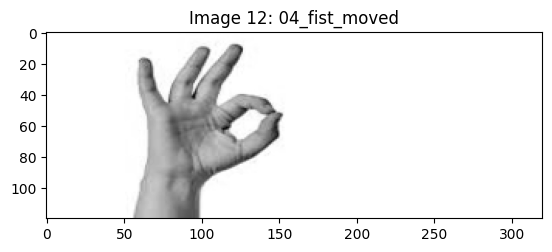

1/1 [==============================] - 0s 21ms/step


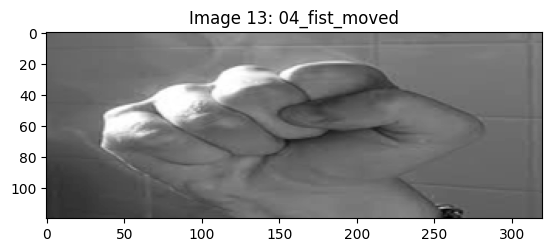

1/1 [==============================] - 0s 21ms/step


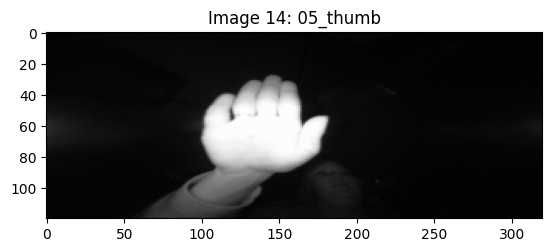

Predicted Gestures: ['05_thumb', '04_fist_moved', '04_fist_moved', '04_fist_moved', '02_l', '05_thumb', '04_fist_moved', '03_fist', '04_fist_moved', '04_fist_moved', '04_fist_moved', '04_fist_moved', '04_fist_moved', '05_thumb']


In [19]:

predicted_gestures = []

for i in range(t_test.shape[0]):
    img_show = t_test[i].reshape(120,320)  
    
    img2 = img_show.reshape(1, 120, 320, 1)  
    img2 /= 255.0  
    
    predictions = loaded_model.predict(img2)
 
    predicted_class = np.argmax(predictions)
    predicted_gesture = reverselookup[predicted_class]
    predicted_gestures.append(predicted_gesture)
    
    plt.imshow(img_show, cmap='gray') 
    
    plt.title(f"Image {i + 1}: {predicted_gesture}")
    plt.show()
print("Predicted Gestures:", predicted_gestures)

1/1 [==============================] - 0s 29ms/step
Predicted Gestures: ['05_thumb', '04_fist_moved', '04_fist_moved', '04_fist_moved', '02_l', '05_thumb', '04_fist_moved', '03_fist', '04_fist_moved', '04_fist_moved', '04_fist_moved', '04_fist_moved', '04_fist_moved', '05_thumb']


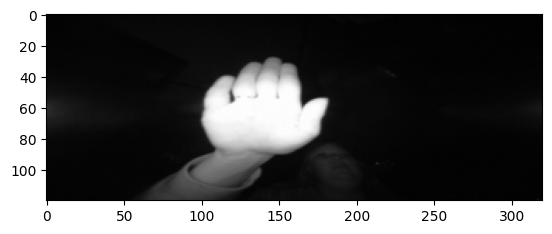

In [20]:
import matplotlib.pyplot as plt

 
folder_path = '/kaggle/input/test2-img/'

 
predicted_gestures = []
 
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        
        img_path = os.path.join(folder_path, filename)

       
        img = Image.open(img_path).convert('L')  # Convert to grayscale
        img = img.resize((320, 120))
        arr = np.array(img)
        t_test = arr.reshape((1, 120, 320, 1))
        t_test = t_test / 255.0
        plt.imshow(arr, cmap='gray')

   
        predictions = loaded_model.predict(t_test)

 
        predicted_class = np.argmax(predictions)
        predicted_gesture = reverselookup[predicted_class]
        predicted_gestures.append(predicted_gesture)

print("Predicted Gestures:", predicted_gestures)


In [21]:
x_data.size, y_data.size, t_test.view

(768000000, 200000, <function ndarray.view>)